##### Copyright 2021 Qiyang Hu

In [3]:
#@title Licensed under MIT License (the "License");
# You may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://huqy.github.io/learning_sklearn/LICENSE.md
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Titanic Kaggle Challenge, a case study

Major ideas of data processing are mainly adopted from [Link](https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html)

## Setup the useful libraries

In [4]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import numpy as np
import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt

import seaborn as sns
import sklearn

import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'large',
    'legend.fontsize': 12,
    
    'figure.figsize': [10, 3]
}
plot.rcParams.update(params)

def status(feature):
    print('Processing', feature, ': ok')

In [5]:
print("numpy version: ", np.__version__)
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)
print("Scikit-learn version: ", sklearn.__version__)

numpy version:  1.19.5
Pandas version:  1.1.5
Seaborn version:  0.11.1
Scikit-learn version:  0.22.2.post1


## Get the data

### `wget` from github repo

In [6]:
import io
import requests

url_train = "https://raw.githubusercontent.com/huqy/learning-sklearn/main/data/train.csv"
url_test = "https://raw.githubusercontent.com/huqy/learning-sklearn/main/data/test.csv"

In [7]:
data = pd.read_csv(url_train)
print(data.shape)

(891, 12)


### Loading training dataset

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis (EDA)

### Check if it is an imbalanced classification problem

Survival rate:  0.3838383838383838


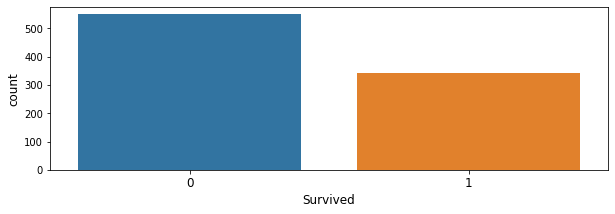

In [9]:
sns.countplot(x='Survived', data=data)
print("Survival rate: ", data.Survived.sum()/data.Survived.count())

Good! No imbalance class problem here, we can follow standard approach.

### Pre-rocessing the missing data

We may need to refine it further for better results.

In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Visulizing the data

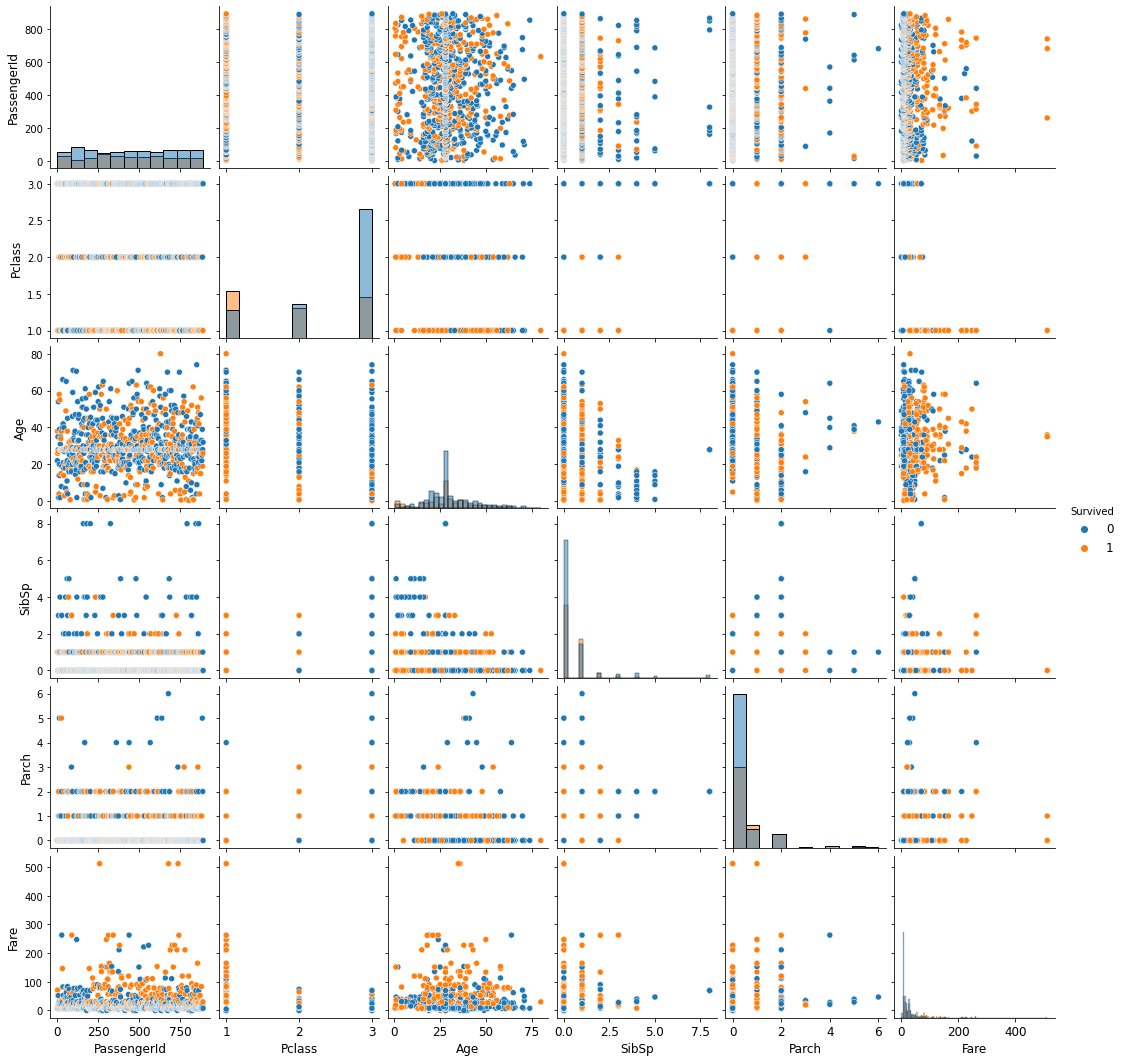

In [13]:
sns.pairplot(data, diag_kind="hist", hue="Survived")

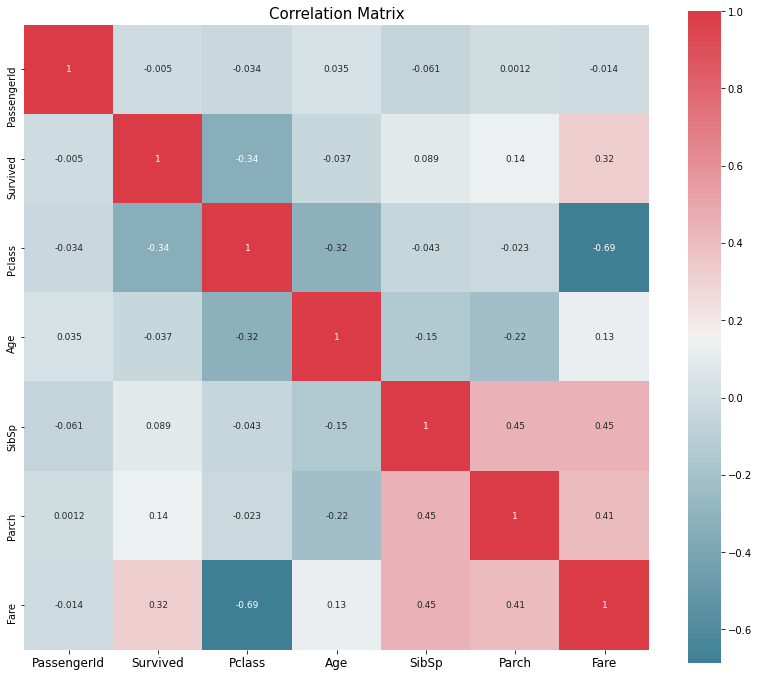

In [14]:
def correlation_heatmap(df, method):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(method=method),
        cmap = colormap,
        square=True, 
        annot=True, 
        annot_kws={'fontsize':9 }
    )
    
    plt.title('Correlation Matrix', y=1.05, size=15)
correlation_heatmap(data, 'spearman')

In [15]:
data['Died'] = 1 - data['Survived']

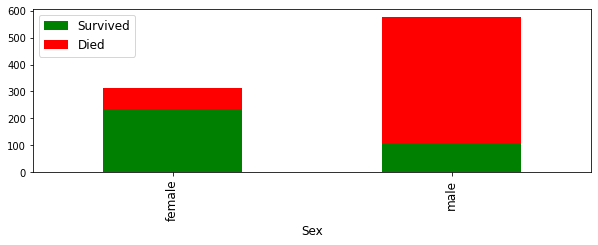

In [16]:
data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', stacked=True, color=['g', 'r']);

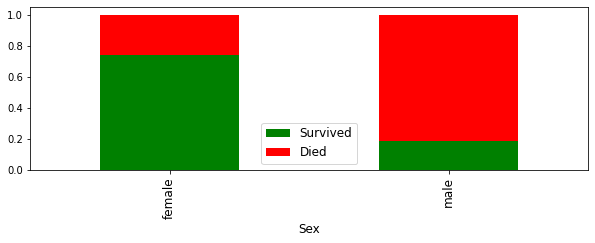

In [17]:
data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', stacked=True, color=['g', 'r']);

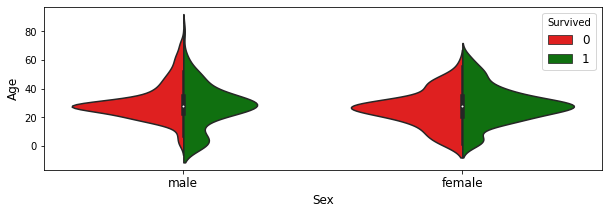

In [18]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True, palette={0: "r", 1: "g"});

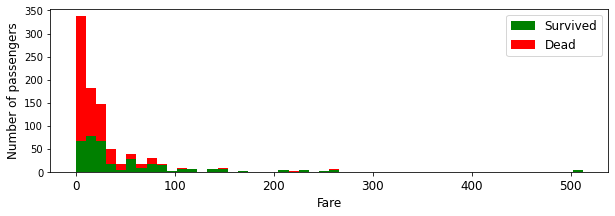

In [19]:
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']], stacked=True, color = ['g','r'], bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

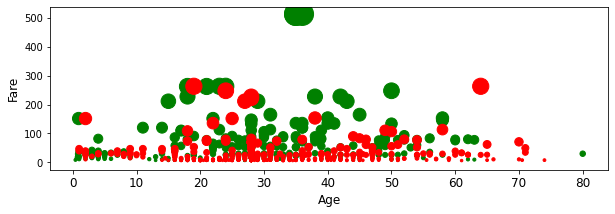

In [20]:
ax = plt.subplot()
ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], c='green', s=data[data['Survived'] == 1]['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], c='red', s=data[data['Survived'] == 0]['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare');

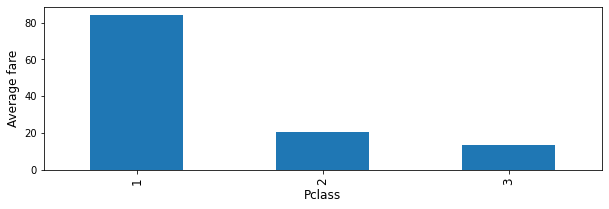

In [21]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar', ax = ax);

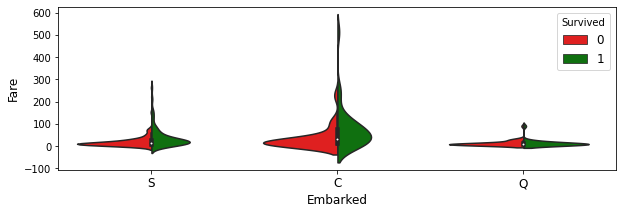

In [22]:
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=data, split=True, palette={0: "r", 1: "g"});

## Feature Engineering

### Combining train and test dataset

In [23]:
def get_combined_data():
    # reading train data
    #train = pd.read_csv('train.csv')
    train = pd.read_csv(url_train)
    
    # reading test data
    #test = pd.read_csv('test.csv')
    test = pd.read_csv(url_test)

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop(['Survived'], 1, inplace=True)
    

    # merging train data and test data for future feature engineering
    # we'll also remove the PassengerID since this is not an informative feature
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'PassengerId'], inplace=True, axis=1)
    
    return combined

In [24]:
combined = get_combined_data()

In [25]:
print(combined.shape)

(1309, 10)


In [26]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
combined.isna().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

### Extracting the passenger titles

In [28]:
titles = set()
for name in data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print (titles)

{'Rev', 'Mlle', 'Major', 'Jonkheer', 'Lady', 'Mr', 'Dr', 'Capt', 'Mrs', 'Col', 'Don', 'the Countess', 'Master', 'Sir', 'Ms', 'Mme', 'Miss'}


We'd like to summarize 5 categories of titles as:


* Officer
* Royalty
* Mr
* Mrs
* Miss

In [29]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # we extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)
    status('Title')
    return combined

In [30]:
combined = get_titles()

Processing Title : ok


In [31]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [32]:
combined[combined['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


Fine for missing title in "1305" with a NaN value because it is in the training set!

### Further processing the missing-value ages

In [33]:
print('Number of missing ages in training set', combined.iloc[:891].Age.isnull().sum())
print('Number of missing ages in test set', combined.iloc[891:].Age.isnull().sum())

Number of missing ages in training set 177
Number of missing ages in test set 86


In [34]:
grouped_train = combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [35]:
grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


In [36]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global combined
    # a function that fills the missing values of the Age variable
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    status('age')
    return combined

In [37]:
combined = process_age()

Processing age : ok


### Processing names to make title features binary

In [38]:
def process_names():
    global combined
    # we clean the Name variable
    combined.drop('Name', axis=1, inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)
    
    # removing the title variable
    combined.drop('Title', axis=1, inplace=True)
    
    status('names')
    return combined

In [39]:
combined = process_names()

Processing names : ok


In [40]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


### Processing missing-value fares

In [41]:
def process_fares():
    global combined
    # there's one missing fare value - replacing it with the mean.
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)
    status('fare')
    return combined

In [42]:
combined = process_fares()

Processing fare : ok


### Processing Embarked

In [43]:
def process_embarked():
    global combined
    # two missing embarked values - filling them with the most frequent one in the train  set(S)
    combined.Embarked.fillna('S', inplace=True)
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('embarked')
    return combined

In [44]:
combined = process_embarked()

Processing embarked : ok


In [45]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


### Processing Cabin

In [46]:
train_cabin, test_cabin = set(), set()

for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
        
for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

In [47]:
print('Cabin set in training dataset:', sorted(train_cabin))
print('Cabin set in testing dataset: ', sorted(test_cabin))

Cabin set in training dataset: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U']
Cabin set in testing dataset:  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'U']


In [48]:
def process_cabin():
    global combined    
    # replacing missing cabins with U (for Uknown)
    combined.Cabin.fillna('U', inplace=True)
    
    # mapping each Cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')    
    combined = pd.concat([combined, cabin_dummies], axis=1)

    combined.drop('Cabin', axis=1, inplace=True)
    status('cabin')
    return combined

In [49]:
combined = process_cabin()

Processing cabin : ok


In [50]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### Processing Sex

In [51]:
def process_sex():
    global combined
    # mapping string values to numerical one 
    combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})
    status('Sex')
    return combined

In [52]:
combined = process_sex()

Processing Sex : ok


### Processing Pclass

In [53]:
def process_pclass():
    
    global combined
    # encoding into 3 categories:
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
    
    # adding dummy variable
    combined = pd.concat([combined, pclass_dummies],axis=1)
    
    # removing "Pclass"
    combined.drop('Pclass',axis=1,inplace=True)
    
    status('Pclass')
    return combined

In [54]:
combined = process_pclass()

Processing Pclass : ok


In [55]:
combined.head()

,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
4,1,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


### Processing Ticket

In [56]:
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

In [57]:
tickets = set()
for t in combined['Ticket']:
    tickets.add(cleanTicket(t))

In [58]:
print (len(tickets))

37


In [59]:
def process_ticket():
    
    global combined
    
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        #ticket = filter(lambda t : not t.isdigit(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    

    # Extracting dummy variables from tickets:

    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)

    status('Ticket')
    return combined

In [60]:
combined = process_ticket()

Processing Ticket : ok


In [61]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Processing Family

We want to introduce 4 new features for family values:

* FamilySize : the total number of relatives including the passenger (him/her)self.
* Sigleton : a boolean variable that describes families of size = 1
* SmallFamily : a boolean variable that describes families of 2 <= size <= 4
* LargeFamily : a boolean variable that describes families of 5 < size

In [62]:
def process_family():
    
    global combined
    # introducing a new feature : the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    status('family')
    return combined

In [63]:
combined = process_family()

Processing family : ok


In [64]:
print (combined.shape)

(1309, 67)


In [65]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


## Modeling

### Setup imports and preparations

In [66]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from xgboost import XGBClassifier
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer

from sklearn import ensemble, tree, svm, naive_bayes, neighbors, linear_model, gaussian_process, neural_network
#from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, roc_auc_score, make_scorer

To evaluate our model we'll be using a 5-fold cross validation with the accuracy.

In [67]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [68]:
def recover_train_test_target():
    global combined
    
    targets = pd.read_csv(url_train, usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    
    return train, test, targets

In [69]:
train, test, targets = recover_train_test_target()

### Scaling the numericals in the training data

In [70]:
train_numerical_features = list(train.select_dtypes(include=['int64', 'float64', 'int32']).columns)
#train_numerical_features = ['Age', 'Fare', 'FamilySize']

In [71]:
ss_scaler = StandardScaler()
train = pd.DataFrame(data = train)
train.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


### Feature selection

Tree-based estimators can be used to compute feature importances.

In [72]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [73]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

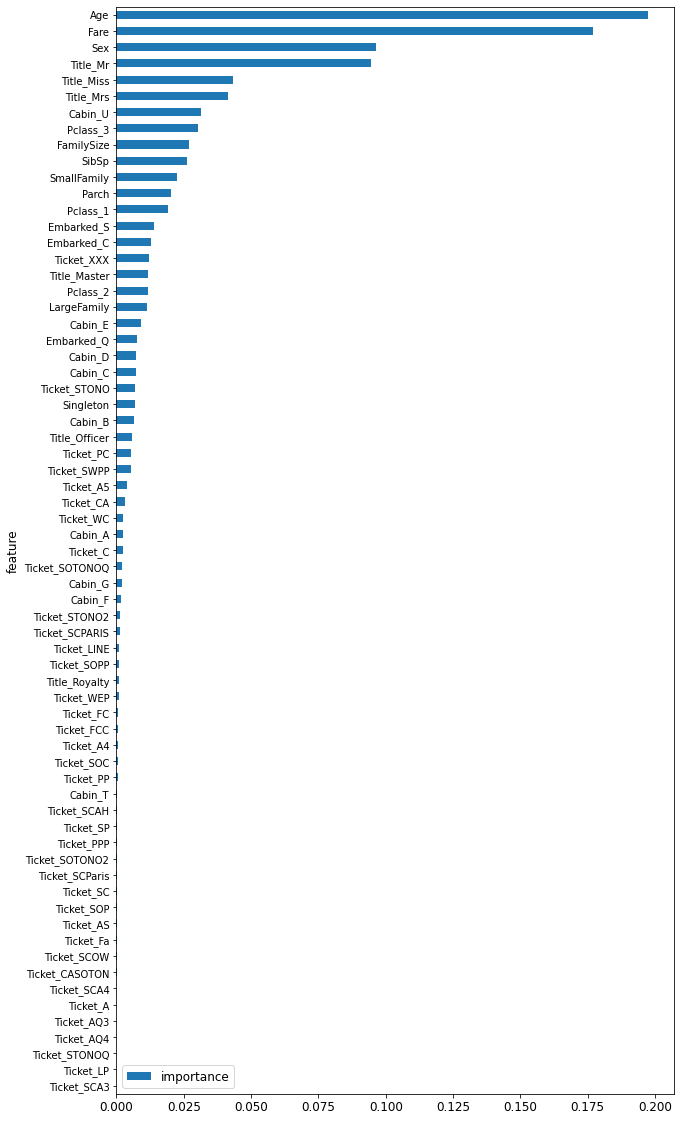

In [74]:
features.plot(kind='barh', figsize=(10, 20))

In [75]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print (train_reduced.shape)

(891, 13)


In [76]:
test_reduced = model.transform(test)
print (test_reduced.shape)

(418, 13)


In [77]:
targets.shape

(891,)

### Inspection for solo-feature classification problem

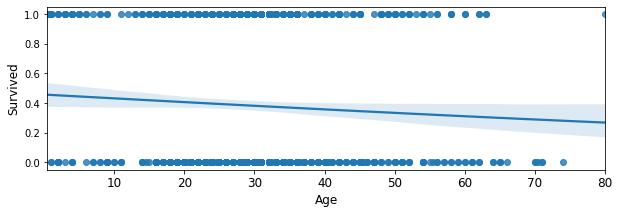

In [78]:
sns.regplot(x='Age', y='Survived', data=data, logistic=True)

In [79]:
X = data['Age'].values.reshape(-1,1)
Y = targets

clf = LogisticRegression()
clf.fit(X,np.ravel(Y.astype(int)))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
clf.coef_[0]

array([-0.01039606])

In [81]:
score = compute_score(clf=clf, X=X, y=targets, scoring='accuracy')
print("Accuracy Score:", score)


Accuracy Score: 0.6161634548992531


Text(0, 0.5, 'Probability of Survival')

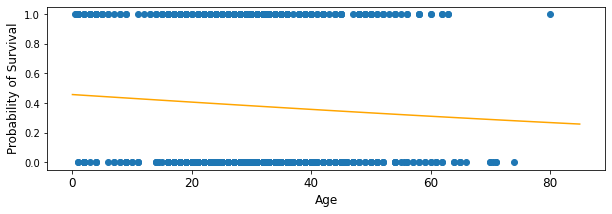

In [82]:
xlim = (0, 85)
xx = np.linspace(xlim[0], xlim[1], 85).reshape(-1,1)
Z = clf.predict_proba(xx)
Z = Z[:, 1].reshape(xx.shape)


ax = plt.subplot()
ax.scatter(X,Y)
ax.plot(xx,Z, c="orange")
plt.xlabel("Age")
plt.ylabel("Probability of Survival")

### Inspection for a dual-feature classification problem

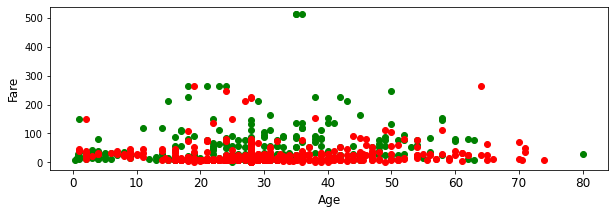

In [83]:
ax = plt.subplot()
ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], c='green')
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], c='red')
plt.xlabel('Age')
plt.ylabel('Fare');

In [84]:
#X = train[['Age','Fare']].as_matrix()
X = train[['Age', 'Fare']].to_numpy()

In [85]:
clf = naive_bayes.GaussianNB()
clf.fit(X, targets)

GaussianNB(priors=None, var_smoothing=1e-09)

In [86]:
score = compute_score(clf=clf, X=X, y=targets, scoring='accuracy')
print(score)

0.6667629150712446


In [87]:
xlim = (0, 85)
ylim = (0, 550)
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 85),
                     np.linspace(ylim[0], ylim[1], 550))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

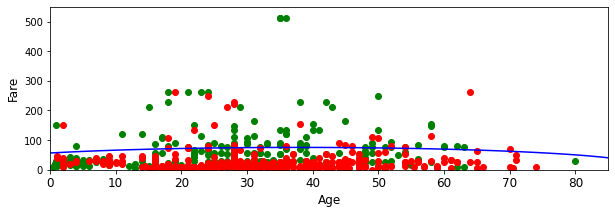

In [88]:
ax = plt.subplot()

ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], c='green')
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], c='red')

ax.contour(xx, yy, Z, [0.5], colors='blue')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('Age')
ax.set_ylabel('Fare')

plt.show()

### Different base models

In [89]:
logreg     = LogisticRegression()
logreg_cv  = LogisticRegressionCV(max_iter=700)
rf         = RandomForestClassifier()
gboost     = GradientBoostingClassifier()
xgb        = XGBClassifier()
svmsvc     = svm.SVC(probability=True)
perceptron = linear_model.Perceptron()
gaussiannb = naive_bayes.GaussianNB()
gaussianp  = gaussian_process.GaussianProcessClassifier()
adaboost   = ensemble.AdaBoostClassifier()

models = [logreg, logreg_cv, rf, gboost, xgb, svmsvc, perceptron, gaussiannb, gaussianp, adaboost]

In [90]:
#Do some preperation for the loop
col = []
algorithms = pd.DataFrame(columns = col)
idx = 0

#Train and score algorithms
for a in models:
    
    a.fit(train_reduced, targets)
    pred = a.predict(train_reduced)
    acc = accuracy_score(targets, pred) #Other way: a.score(X_test, y_test)
    f1 = f1_score(targets, pred)
    cv = cross_val_score(a, train_reduced, targets).mean()
    
    Alg = a.__class__.__name__
    
    algorithms.loc[idx, 'Algorithm'] = Alg
    algorithms.loc[idx, 'Accuracy'] = round(acc * 100, 2)
    algorithms.loc[idx, 'F1 Score'] = round(f1 * 100, 2)
    algorithms.loc[idx, 'CV Score'] = round(cv * 100, 2)

    idx+=1

In [91]:
#Compare invidual models
algorithms.sort_values(by = ['CV Score'], ascending = False, inplace = True)    
algorithms.head()

,Algorithm,Accuracy,F1 Score,CV Score
4,XGBClassifier,87.88,83.49,83.61
3,GradientBoostingClassifier,89.45,85.63,83.05
1,LogisticRegressionCV,82.72,77.22,82.15
0,LogisticRegression,82.60,77.10,81.93
2,RandomForestClassifier,98.77,98.38,81.71


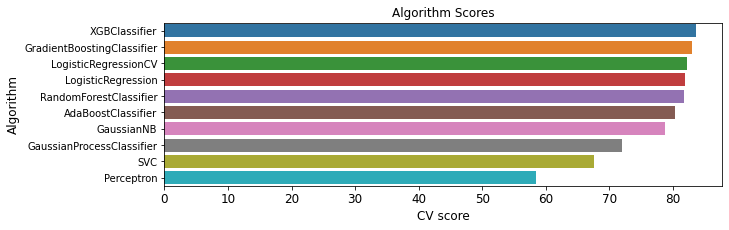

In [92]:
g = sns.barplot("CV Score", "Algorithm", data = algorithms)
g.set_xlabel("CV score")
g = g.set_title("Algorithm Scores")

In [93]:
for model in models:
    print ('Cross-validation of : {0}'.format(model.__class__.__name__))
    score = compute_score(clf=model, X=train_reduced, y=targets, scoring='accuracy')
    print ('CV score = {0}'.format(score))
    print ('****')

Cross-validation of : LogisticRegression
CV score = 0.819295712761283
****
Cross-validation of : LogisticRegressionCV
CV score = 0.8215366267026551
****
Cross-validation of : RandomForestClassifier
CV score = 0.8137028435126483
****
Cross-validation of : GradientBoostingClassifier
CV score = 0.830525390747599
****
Cross-validation of : XGBClassifier
CV score = 0.8361308141359615
****
Cross-validation of : SVC
CV score = 0.6757454020463248
****
Cross-validation of : Perceptron
CV score = 0.5837549431925178
****
Cross-validation of : GaussianNB
CV score = 0.7879040863724812
****
Cross-validation of : GaussianProcessClassifier
CV score = 0.7194400853681502
****
Cross-validation of : AdaBoostClassifier
CV score = 0.8024919967359235
****


### Hyperparameters tuning

#### Random Forest model grid search

We will select Random Forest model as an example with using the full train set.

In [94]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = True

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1,
                               n_jobs=-1
                              )

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed:   32.9s


Best score: 0.8372481325717155
Best parameters: {'bootstrap': True, 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}


[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  1.1min finished


#### Gradient boost model grid search

In [ ]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = True

if run_gs:
    parameter_grid = {
                "max_depth":[6, 8, 10],
                "n_estimators":[40, 20, 10, 5],
                "max_features":["sqrt", "auto", "log2"],
                "min_samples_split": [10, 20, 30, 40],
                "min_samples_leaf": [3, 10, 20],
                
                 }
    gboost = GradientBoostingClassifier()
    #cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(gboost,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=5,
                               verbose=1,
                               n_jobs=-1
                              )

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

#### XGBoost model randomized search

In [ ]:
gbm_param_grid = {
    'n_estimators': range(6, 20),
    'max_depth': range(2, 10),
    'learning_rate': [.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1]
}

# Instantiate the regressor: gbm
gbm = XGBClassifier(n_estimators=10)

# Perform random search: grid_mse
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                estimator = gbm, scoring = "accuracy", 
                                verbose = 1, n_iter = 1000, cv = 5, n_jobs=-1)

# Fit randomized_mse to the data
xgb_random.fit(train, targets)
model = xgb_random

# Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_random.best_params_)
print("Best accuracy found: ", xgb_random.best_score_)

#### XGBoost model grid search

In [ ]:
param_test1 = {
    'n_estimators': [20, 100,200,500],
    'max_depth': [3,5,7,9],
    'min_child_weight': [1,3,5],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05, 0.1, 1],
    'learning_rate': [0.01, 0.02, 0.05, 0.1]
}
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
gsearch1 = GridSearchCV(estimator = XGBClassifier(), 
                       param_grid = param_test1, 
                       scoring=scoring, iid=False,
                       cv=5, verbose = 1, n_jobs=-1,
                       refit='Accuracy')
gsearch1.fit(train, targets)
model = gsearch1

# Print the best parameters and lowest RMSE
print("Best parameters found: ", model.best_params_)
print("Best accuracy found: ", model.best_score_)

### Making prediction and submission to check the score

In [95]:
output = model.predict(test).astype(int)
aux = pd.read_csv(url_test)

# df_output is saved in a Kaggle submission format.
df_output = pd.DataFrame()
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('gridsearch_rf.csv', index=False)

In [96]:
aux_0 = pd.DataFrame()
aux_0['survived_predict'] = output
aux_0['name'] = aux['Name']
print(aux_0.shape)
aux_0.head()

(418, 2)


,survived_predict,name
0,0,"Kelly, Mr. James"
1,1,"Wilkes, Mrs. James (Ellen Needs)"
2,0,"Myles, Mr. Thomas Francis"
3,0,"Wirz, Mr. Albert"
4,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)"


In [99]:
url_truth="https://raw.githubusercontent.com/huqy/learning-sklearn/main/data/truth.csv"

test_truth = pd.read_csv(url_truth)
test_truth.shape

(1309, 14)

In [100]:
test_truth.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [101]:
df3 = test_truth.merge(aux_0, on='name', how='inner')

In [102]:
df3.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived_predict
0,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
1,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY",1
2,1,0,"Beattie, Mr. Thomson",male,36.0,0,0,13050,75.2417,C6,C,A,NaN,"Winnipeg, MN",0
3,1,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S,8,NaN,NaN,1
4,1,0,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C,NaN,148.0,"San Francisco, CA",0


In [103]:
df3['result'] = abs(df3['survived'] - df3['survived_predict'])
print("The precision of the prediction is %4.2f%%" % (df3['result'].value_counts()[0]/df3.shape[0]*100) )

The precision of the prediction is 77.64%
